# Voice Emotion Classification Neural Network Using MFCC by Gender

Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Reading and labeling data

In [3]:
audio_data = np.load("audio_data.npy")
labels = np.load("wav_labels.npy")

# labels: modality-vocal channel-emotion-emotional intensity-statement-repetition-actor
# emotions: 01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# odd number actors = male, even = female

# 1440 files: 24 speakers, 60 recordings per speaker
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    
    if (labels[i][6]%2 == 0):
        label = "Female"
    else:
        label = "Male"

    if (labels[i][2] == 1):
        em = "neutral"
    elif (labels[i][2] == 2):
        em = "calm"
    elif (labels[i][2] == 3):
        em = "happy"
    elif (labels[i][2] == 4):
        em = "sad"
    elif (labels[i][2] == 5):
        em = "angry"
    elif (labels[i][2] == 6):
        em = "fearful"
    elif (labels[i][2] == 7):
        em = "disgust"
    elif (labels[i][2] == 8):
        em = "surprised"
    
    features.append([audio_data[i], label, em])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender", "emotion"])

feature_df.head()


,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm


#### Split Males vs Female Data

In [4]:
#split data - males vs females
mal = feature_df.loc[feature_df['gender'] == "Male"]
fem = feature_df.loc[feature_df['gender'] == "Female"]

#### Males Data

In [5]:
mal

,mfcc,gender,emotion
0,"[-855.3770751953125, -855.3770751953125, -855....",Male,neutral
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male,neutral
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male,neutral
3,"[-842.9385375976562, -843.2474975585938, -850....",Male,neutral
4,"[-911.1758422851562, -910.4053344726562, -905....",Male,calm
...,...,...,...
1375,"[-690.5613403320312, -690.7261352539062, -690....",Male,surprised
1376,"[-692.3702392578125, -691.9732666015625, -691....",Male,surprised
1377,"[-675.92529296875, -675.6678466796875, -675.64...",Male,surprised
1378,"[-660.3748168945312, -660.3748168945312, -660....",Male,surprised


#### Females Data

In [6]:
fem

,mfcc,gender,emotion
60,"[-821.495849609375, -821.495849609375, -821.49...",Female,neutral
61,"[-820.0106811523438, -820.0106811523438, -820....",Female,neutral
62,"[-782.8099365234375, -782.8099365234375, -782....",Female,neutral
63,"[-814.5337524414062, -813.1904907226562, -812....",Female,neutral
64,"[-853.9297485351562, -853.9297485351562, -853....",Female,calm
...,...,...,...
1435,"[-767.8106689453125, -767.8106689453125, -767....",Female,surprised
1436,"[-709.0200805664062, -709.0200805664062, -709....",Female,surprised
1437,"[-739.8688354492188, -739.8688354492188, -739....",Female,surprised
1438,"[-718.31494140625, -718.31494140625, -718.3149...",Female,surprised


In [7]:
## ===== Males ===== ##
X_males = np.array(mal.mfcc.tolist())
y_males = np.array(mal.emotion.tolist())

#20-80 train-test split
X_train_males, X_test_males, y_train_males, y_test_males = sk.model_selection.train_test_split(X_males, y_males, test_size=0.20, random_state=0)

## ===== Females ===== ##
X_females = np.array(fem.mfcc.tolist())
y_females = np.array(fem.emotion.tolist())

#20-80 train-test split
X_train_females, X_test_females, y_train_females, y_test_females = sk.model_selection.train_test_split(X_females, y_females, test_size=0.20, random_state=0)

#### Regularization

In [8]:
## ===== Males ===== ##
scaler_m = StandardScaler()
scaler_m.fit(X_train_males)

X_train_males = scaler_m.transform(X_train_males)
X_test_males = scaler_m.transform(X_test_males)

## ===== Females ===== ##
scaler_f = StandardScaler()
scaler_f.fit(X_train_females)

X_train_females = scaler_f.transform(X_train_females)
X_test_females = scaler_f.transform(X_test_females)

#### Training and Predictions

In [9]:
## ===== Males ===== ##
mlp_m = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=1000)
mlp_m.fit(X_train_males, y_train_males)

predictions_m = mlp_m.predict(X_test_males)

## ===== Females ===== ##
mlp_f = MLPClassifier(hidden_layer_sizes=(10, 15, 10), max_iter=1000)
mlp_f.fit(X_train_females, y_train_females)

predictions_f = mlp_f.predict(X_test_females)

#### Algorithm Evaluation

Results: Males
Emotion Classification
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0        9     2      0    0      3        0        0          1
1        0    14      2    0      1        0        5          0
2        1     4      8    1      2        0        0          0
3        0     2      0    6      5        0        1          5
4        3     0      0    3     11        0        2          0
5        0     1      1    0      3        3        5          0
6        0     7      1    0      4        0        6          0
7        0     0      1    3      7        0        1         10


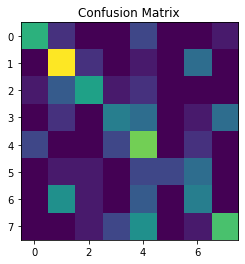

Classification by Gender Precision: 0.5583066239316239
              precision    recall  f1-score   support

       angry       0.69      0.60      0.64        15
        calm       0.47      0.64      0.54        22
     disgust       0.62      0.50      0.55        16
     fearful       0.46      0.32      0.37        19
       happy       0.31      0.58      0.40        19
     neutral       1.00      0.23      0.38        13
         sad       0.30      0.33      0.32        18
   surprised       0.62      0.45      0.53        22

    accuracy                           0.47       144
   macro avg       0.56      0.46      0.47       144
weighted avg       0.54      0.47      0.47       144





Results: Females
Emotion Classification
   neutral  calm  happy  sad  angry  fearful  disgust  surprised
0        9     0      1    3      0        0        1          1
1        0    18      2    1      0        1        0          0
2        3     1     11    0      0        0        1  

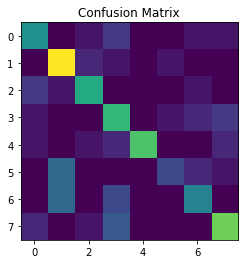

Classification by Gender Precision: 0.647481438812084
              precision    recall  f1-score   support

       angry       0.56      0.60      0.58        15
        calm       0.58      0.82      0.68        22
     disgust       0.69      0.69      0.69        16
     fearful       0.44      0.63      0.52        19
       happy       1.00      0.68      0.81        19
     neutral       0.67      0.31      0.42        13
         sad       0.57      0.44      0.50        18
   surprised       0.67      0.64      0.65        22

    accuracy                           0.62       144
   macro avg       0.65      0.60      0.61       144
weighted avg       0.65      0.62      0.62       144



In [10]:
## ===== Males ===== ##
print("Results: Males")
print("Emotion Classification")
cm_m = confusion_matrix(y_test_males,predictions_m)
df = pd.DataFrame(cm_m, columns=[y_males[0], y_males[4], y_males[12], y_males[20], y_males[28], y_males[36], y_males[44], y_males[52] ])
print(df)
      
#figure for confusion matrix
plt.figure(figsize=(10,4))
plt.imshow(cm_m)
plt.title("Confusion Matrix")
plt.show()

#precision function
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(confmatrix)
    fp = np.sum(confmatrix, axis=0) - tp
    precision = np.mean(tp/(tp+fp))
    return precision

#print calculated precision
prec_m = precision(cm_m)
print("Classification by Gender Precision: " + str(prec_m))
#print metrics report
print(classification_report(y_test_males,predictions_m))

## ===== Females ===== ##
print("\n\n\n")
print("Results: Females")
print("Emotion Classification")
cm_f = confusion_matrix(y_test_females,predictions_f)
df = pd.DataFrame(cm_f, columns=[y_females[0], y_females[4], y_females[12], y_females[20], y_females[28], y_females[36], y_females[44], y_females[52] ])
print(df)
      
#figure for confusion matrix
plt.figure(figsize=(10,4))
plt.imshow(cm_f)
plt.title("Confusion Matrix")
plt.show()

#print calculated precision
prec_f = precision(cm_f)
print("Classification by Gender Precision: " + str(prec_f))
#print metrics report
print(classification_report(y_test_females,predictions_f))
